In [3]:
import requests
import csv
import os

ticker = 'CMIG3.SAO'
key = 'XLSA5LZF5KUUXJX3'
path = (f'data/{ticker}.csv')


if not os.path.exists(path):
    url = (f'https://www.alphavantage.co/query?apikey={key}&function=TIME_SERIES_DAILY_ADJUSTED&symbol={ticker}&datatype=csv&outputsize=full')

    response = requests.get(url)

    if response.status_code == 200:
        content = response.content.decode()
        
        reader = csv.reader(content.splitlines(), delimiter=',')
        
        dataset = list(reader)
        
        with open(path, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(dataset)
    else:
        print(f"Request failed: {response.status_code}")

In [4]:
import pandas as pd
import numpy as np

dataset = pd.read_csv(path)

y = dataset.iloc[4450:, 4:5].values
X = np.array([[i for i in reversed(range(len(y)))]]).reshape(-1,1)

In [29]:

for i, item in enumerate(y):
    print(f'{i}: {item}')

0: [60.5]
1: [62.39]
2: [59.]
3: [57.42]
4: [56.5]
5: [56.]
6: [54.25]
7: [53.8]
8: [53.55]
9: [54.2]
10: [54.8]
11: [56.]
12: [54.51]
13: [55.51]
14: [54.]
15: [56.]
16: [55.94]
17: [54.]
18: [55.92]
19: [56.01]
20: [57.55]
21: [55.52]
22: [53.51]
23: [54.8]
24: [54.52]
25: [56.35]
26: [59.89]
27: [57.68]
28: [56.]
29: [55.98]
30: [55.98]
31: [55.5]
32: [55.37]
33: [53.]
34: [53.82]
35: [57.]
36: [58.]
37: [54.97]
38: [53.6]
39: [54.85]
40: [53.9]
41: [54.01]
42: [52.28]
43: [52.24]
44: [53.]
45: [53.]
46: [51.21]
47: [52.89]
48: [54.]
49: [53.5]
50: [53.55]
51: [55.7]
52: [55.51]
53: [57.98]
54: [55.88]
55: [53.51]
56: [55.5]
57: [55.5]
58: [56.49]
59: [56.51]
60: [56.6]
61: [57.49]
62: [56.]
63: [55.5]
64: [55.46]
65: [54.05]
66: [54.81]
67: [54.66]
68: [56.28]
69: [53.21]
70: [52.51]
71: [53.72]
72: [53.78]
73: [55.51]
74: [53.07]
75: [54.97]
76: [54.24]
77: [53.]
78: [54.5]
79: [54.75]
80: [53.5]
81: [50.78]
82: [49.49]
83: [47.81]
84: [48.46]
85: [47.47]
86: [49.2]
87: [49.85]
88

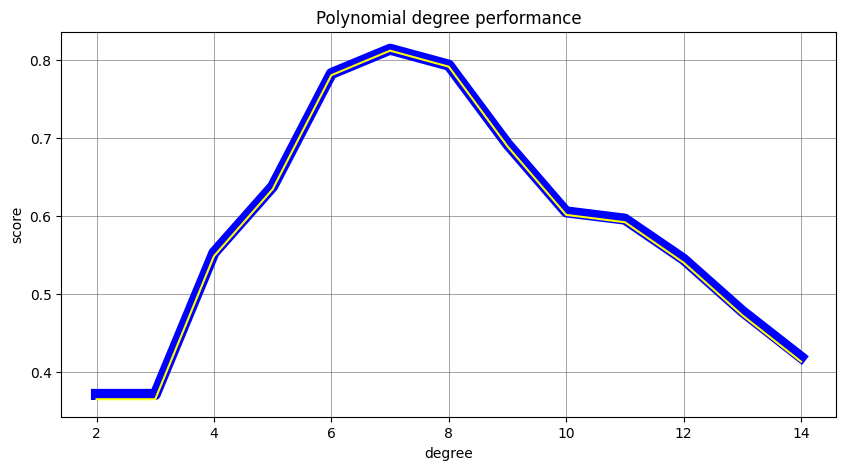

In [148]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

r2A_hist = []
r2_hist = []
degres = []

n = len(X)
k = 1

for num in range(2, 15):
    hist_poly_reg = PolynomialFeatures(degree=num)

    hist_X_poly = hist_poly_reg.fit_transform(X)

    hist_poly_lin_reg = LinearRegression()
    hist_poly_lin_reg.fit(hist_X_poly, y)

    r2 = r2_score(y, hist_poly_lin_reg.predict(hist_X_poly))
    adj_r2 = 1 -((1-r2)*(n-1)/(n-k-1))

    r2_hist.append(r2)
    r2A_hist.append(adj_r2)
    degres.append(num)

plt.figure(figsize=(10, 5))
plt.grid(color='grey', linestyle='-', linewidth=0.5)

plt.title('Polynomial degree performance')

plt.xlabel('degree')
plt.ylabel('score')

plt.plot(degres, r2_hist, color = 'blue', linewidth=8)
plt.plot(degres, r2A_hist, color = 'yellow')

plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

r2A_hist = []
r2_hist = []
degrees = []

n = len(X)
k = 1

for num in range(2, 15):
    hist_poly_reg = PolynomialFeatures(degree=num)

    hist_X_poly = hist_poly_reg.fit_transform(X)

    hist_poly_lin_reg = LinearRegression()
    hist_poly_lin_reg.fit(hist_X_poly, y)

    r2 = r2_score(y, hist_poly_lin_reg.predict(hist_X_poly))
    adj_r2 = 1 -((1-r2)*(n-1)/(n-k-1))

    r2_hist.append(r2)
    r2A_hist.append(adj_r2)
    degrees.append(num)
    
print(degrees[r2A_hist.index(max(r2A_hist))])

7


In [152]:
print(np.argmax(np.array(r2A_hist)))
print(np.array(r2A_hist))

5
[0.3647774  0.36478319 0.54844608 0.63440126 0.78087971 0.81244225
 0.79178615 0.68950024 0.60150407 0.59208093 0.54009409 0.47252697
 0.41303459]


In [141]:
poly_reg = PolynomialFeatures(degree=7)

X_poly = poly_reg.fit_transform(X)

poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly, y)

LinearRegression()

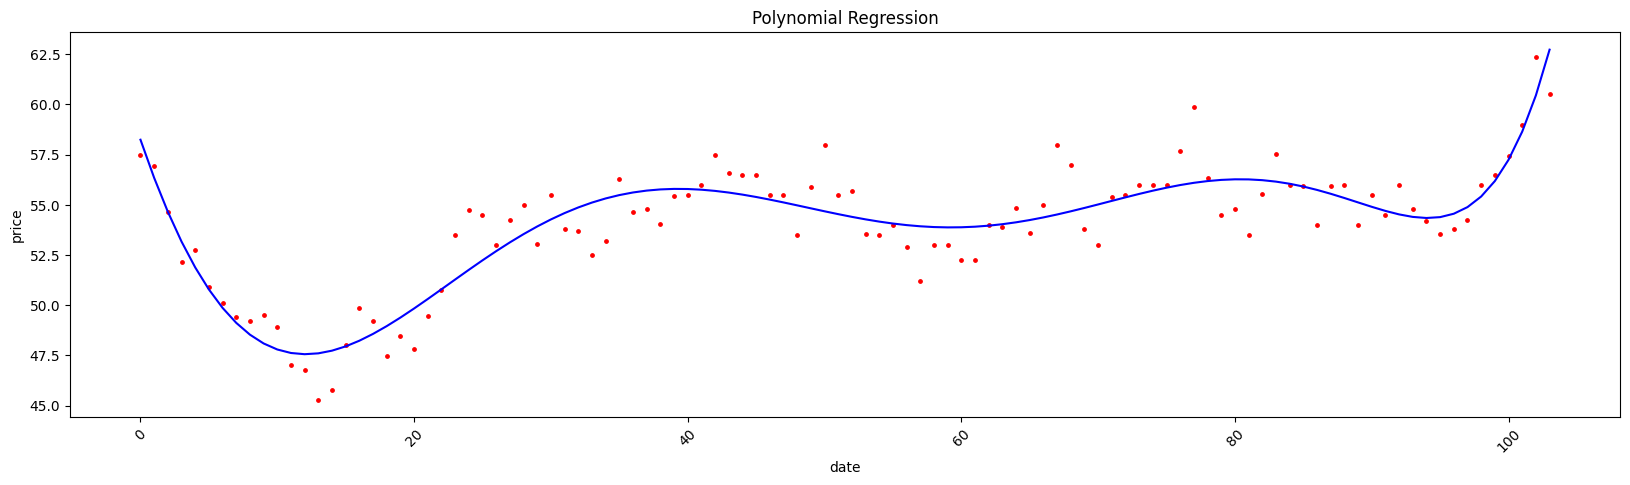

In [142]:
y_pred = poly_lin_reg.predict(X_poly)

plt.figure(figsize=(20, 5))  

plt.scatter(X, y, color = 'red', s=6)
plt.plot(X, y_pred, color = 'blue')

plt.title('Polynomial Regression')
plt.xlabel('date')
plt.ylabel('price')
plt.xticks(rotation=45) 

plt.show()

In [32]:
print([[i for i in range(40, 50)]])

[[40, 41, 42, 43, 44, 45, 46, 47, 48, 49]]
